<a href="https://colab.research.google.com/github/UoA-eResearch/deep-learning-tutorial-2019/blob/master/Exercise%202%20-%20multi-class%20iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2: The Iris Dataset
In this exercise we will create a neural network to classify 3 different types of Iris (Setosa, Versicolor and Virginica) based on their sepal length, sepal width, petal length and petal width.

![Irises](http://dataaspirant.com/wp-content/uploads/2017/01/irises.png)

This is a multi class classification problem. It is similar to the Pima Indian's binary classification exercise, but with three classes to predict instead of two.

### Import dependencies
Start by importing the dependencies we will need for the project

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn import metrics

Using TensorFlow backend.


In [0]:
def plot_acc_loss(history):
    f, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))
    
    # Summarize history of accuracy
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('model loss')
    ax1.legend(['train', 'test'], loc='upper left')
    
    # Summarize history of accuracy
    ax2.plot(history.history['acc'])
    ax2.plot(history.history['val_acc'])
    ax2.set_title('model accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'test'], loc='upper left')
    
    plt.subplots_adjust(hspace=0.5)
    plt.show()

### Set seed
Set a seed value so that when we repeatedly run our code we will get the same result. Using the same seed is important when you want to compare algorithms.

In [0]:
seed = 7
np.random.seed(seed)

### Import data
The Iris dataset contains four features from 150 different Iris flowers. The features in the dataset are described below.

* Sepal length (cm)
* Sepal width (cm)
* Petal length (cm)
* Petal width (cm)
* Class: Iris setosa, Iris versicolor or Iris virginica

Sepals are the part of a flower that protect and support the petals. The petals surround the reproductive parts of the flower.

![Iris labeled](http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg)

A snapshot of the dataset is illustrated below (not in order).

|Sepal Length|Sepal Width|Petal Length|Petal Width|Class|
|---|---|---|---|-----------|
|5.1|3.5|1.4|0.2|Iris-setosa|
|4.9|3.0|1.4|0.2|Iris-setosa|
|7.0|3.2|4.7|1.4|Iris-versicolor|
|6.4|3.2|4.5|1.5|Iris-versicolor|
|6.3|3.3|6.0|2.5|Iris-virginica|
|5.8|2.7|5.1|1.9|Iris-virginica|

To load this data into memory, use the `np.loadtxt` function. The data type (`dtype`) is set to `str` because our input data is a mix of numbers and strings. This will be dealt with when we split the data.

In [4]:
data = np.loadtxt('https://raw.githubusercontent.com/UoA-eResearch/deep-learning-tutorial-2019/master/data/iris.csv', delimiter=",", dtype=str)
print(data[:20])

[['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.0' '1.4' '0.2' 'Iris-setosa']
 ['4.7' '3.2' '1.3' '0.2' 'Iris-setosa']
 ['4.6' '3.1' '1.5' '0.2' 'Iris-setosa']
 ['5.0' '3.6' '1.4' '0.2' 'Iris-setosa']
 ['5.4' '3.9' '1.7' '0.4' 'Iris-setosa']
 ['4.6' '3.4' '1.4' '0.3' 'Iris-setosa']
 ['5.0' '3.4' '1.5' '0.2' 'Iris-setosa']
 ['4.4' '2.9' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.1' '1.5' '0.1' 'Iris-setosa']
 ['5.4' '3.7' '1.5' '0.2' 'Iris-setosa']
 ['4.8' '3.4' '1.6' '0.2' 'Iris-setosa']
 ['4.8' '3.0' '1.4' '0.1' 'Iris-setosa']
 ['4.3' '3.0' '1.1' '0.1' 'Iris-setosa']
 ['5.8' '4.0' '1.2' '0.2' 'Iris-setosa']
 ['5.7' '4.4' '1.5' '0.4' 'Iris-setosa']
 ['5.4' '3.9' '1.3' '0.4' 'Iris-setosa']
 ['5.1' '3.5' '1.4' '0.3' 'Iris-setosa']
 ['5.7' '3.8' '1.7' '0.3' 'Iris-setosa']
 ['5.1' '3.8' '1.5' '0.3' 'Iris-setosa']]


Separate the data into input (X) and output (y) variables.

Note that we convert the input data into floats.

In [0]:
X = data[:, 0:4].astype(float)
y = data[:, 4]

If you look carefully at the target values, you will notice that they are strings, i.e. 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'.

Keras needs numbers or matrices to work with, so we will need to reformat the target values.

The problem with converting the class values to numbers (e.g. 'Iris-setosa' becomes 0, 'Iris-versicolor' 1 etc) is that it implies that the target values are ordinal. That is, 'Iris-setosa' is somehow less than 'Iris-versicolor'.

A better way to represent classes in a multi-class classification problem, is to 'one hot encode' the target values. An example is shown below. A matrix of zeros is generated. Each row corresponds to a sample and each column corresponds to a particular class. A 1 is placed into the column to incidicate the class that it belongs too.

|Iris-setosa|Iris-versicolor|Iris-virginica|
|---|---|---|
|1|0|0|
|0|1|0|
|0|0|1|

One hot encoding is a two step process. First encode the target values (y) into an array of numbers using the `LabelEncoder` from scikit-learn and then one hot encode the numbers with the `np_utils.to_categorical` function.

In [0]:
y_encoded = LabelEncoder().fit(y).transform(y) # Convert the classes into numbers
y_one_hot_encoded = np_utils.to_categorical(y_encoded) # One hot encode the numbers

In [7]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
y_one_hot_encoded[0:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

Like the previous exercise, use the `train_test_split` function from scikit-learn to split the input and target data into training and test datasets.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot_encoded, test_size=0.33, random_state=seed)

### Create the model
The code snippet below creates a very basic neural network model, with three layers: an input layer, a hidden layer and an output layer.

The first layer is a fully connected `Dense` layer. We use four neurons in the hidden layer and have 4 input neurons for the 4 features.

The last layer has 3 neurons, one for each class.

In [10]:
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu', kernel_initializer='normal'))
model.add(Dense(3, activation='sigmoid', kernel_initializer='normal'))

Instructions for updating:
Colocations handled automatically by placer.


### Compile the model
We then compile the model. The loss function is set to `categorical_crossentropy` (different from the loss function used in the binary classification exercise) because we are performing multi-class classification.

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit the model
Now that we have compiled the model, we can train it with the data we prepared earlier. We are using more epochs but a smaller batch size than the previous exercise.

To see the model training history in text, just don't include `verbose=0`

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=5)

Instructions for updating:
Use tf.cast instead.
Train on 100 samples, validate on 50 samples
Epoch 1/200
100/100 [==============================] - 1s 6ms/step - loss: 1.0999 - acc: 0.3600 - val_loss: 1.0989 - val_acc: 0.2800
Epoch 2/200
100/100 [==============================] - 0s 322us/step - loss: 1.0974 - acc: 0.5400 - val_loss: 1.0968 - val_acc: 0.6400
Epoch 3/200
100/100 [==============================] - 0s 261us/step - loss: 1.0952 - acc: 0.6800 - val_loss: 1.0942 - val_acc: 0.6400
Epoch 4/200
100/100 [==============================] - 0s 271us/step - loss: 1.0925 - acc: 0.6800 - val_loss: 1.0906 - val_acc: 0.6400
Epoch 5/200
100/100 [==============================] - 0s 271us/step - loss: 1.0886 - acc: 0.6600 - val_loss: 1.0855 - val_acc: 0.6400
Epoch 6/200
100/100 [==============================] - 0s 255us/step - loss: 1.0835 - acc: 0.6800 - val_loss: 1.0795 - val_acc: 0.6400
Epoch 7/200
100/100 [==============================] - 0s 243us/step - loss: 1.0761 - acc: 0.6800 -

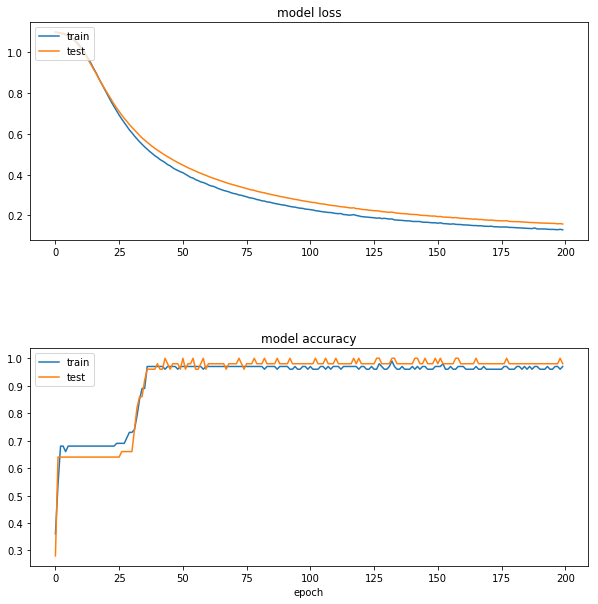

In [13]:
plot_acc_loss(history)

### Evaluate the model
Now that we have trained our model, we can evaluate the performance on the test data.

In [14]:
scores = model.evaluate(X, y_one_hot_encoded)
print("\n\n{0}: {1:.2f}%".format(model.metrics_names[1], scores[1]*100))

150/150 [==============================] - 0s 58us/step


acc: 96.67%


In [0]:
y_pred = model.predict_classes(X)

In [16]:
matrix = metrics.confusion_matrix(y_encoded, y_pred) # (y_true,y_pred)
print(matrix)

[[50  0  0]
 [ 0 46  4]
 [ 0  1 49]]


In [17]:
(50+46+49)/(50+46+49+1+4)

0.9666666666666667